<b style='color:blue'>Matthew Kline</b>

## Objectives
I am using this project to demonstrate an end to end understanding of data science while exploring machine learning methodologies.  The processes I will explore are as follows:

- Frame the problem and look at the big picture.
- Get the data
- Explore the data to gain insights. 
- Prepare the data to expose the underlying data patterns to Machine Learning algorithms. 
- Explore many different models and short-list the best ones. 
- Fine-tune my models and combine them into a great solution. 
- Cross analyze

<h2 style='color:purple'> Frame the Problem</h2>

### Sensor Data
The data source as well as the exact nature of the data is confidential. Each data instance contains 12 real-valued input attributes. Each input attribute represents a sensor designed to detect the presence of one or two groups of substances. As an alternative, the sensor readings may represent a 'false alrarm'. 

- Substance 1 is represented by the value 'one' in the class attribute column. 
- Substance 2 is represented by the value 'two' in the class attribute column. 
- A false alarm is represented by the value 'three' in the class attribute column. 

The problem in framed as a **supervised learning** problem: Predict the class of a substance from sensor data using the given measurements in the dataset. 

In [42]:
# import packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)

<h2 style='color:green'>Exploratory Data Analysis</h2>
<h3>Using Pandas to load my data into a dataframe</h3>


In [43]:
import pandas as pd

df = pd.read_csv('Sensor_Data.csv')

df.iloc[:10]

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,class
0,4.406,0.6116,5.691,5.906,1.763,2.726,0.9607,0.6055,1.859,5.083,5.503,0.7544,one
1,4.680,0.5322,5.461,5.923,1.589,2.799,0.9937,0.6250,1.821,5.099,5.601,0.9546,one
2,4.738,0.5298,5.680,5.916,1.844,2.798,1.0280,0.6238,1.759,5.127,5.535,0.7275,one
3,4.503,0.5273,5.703,-9999.000,1.711,2.856,1.1500,0.6201,1.736,5.094,5.452,0.7690,one
4,4.744,0.5884,5.532,5.911,1.792,2.886,1.0310,0.5627,1.868,4.989,5.382,0.6665,one
5,4.524,0.6311,5.773,5.822,1.803,2.800,1.0490,0.6836,1.885,5.100,5.479,0.6958,one
6,4.570,0.4834,5.804,5.887,1.708,2.894,1.0830,0.4919,1.807,5.062,5.336,0.8447,one
7,4.489,0.5054,5.790,5.900,1.849,2.919,0.9082,0.6055,1.809,5.216,5.555,0.6897,one
8,4.503,0.6091,5.686,5.892,1.714,2.822,1.0300,0.6079,1.840,5.001,5.360,0.9521,one
9,4.425,0.6091,5.732,5.912,1.793,2.726,1.0950,0.6104,1.749,5.020,5.514,0.8081,one


<h3> Summary statistics</h3>

In [44]:
df.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12
count,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,-134.420804,-118.114677,-109.102194,-91.399119,-125.040359,-130.537302,-77.319851,-125.663162,-95.131987,-75.160382,-88.122777,-63.045762
std,1167.492978,1089.498394,1062.557232,975.926752,1115.959694,1141.932576,880.138338,1115.889116,975.558523,880.331222,944.963450,810.287385
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,3.018500,0.820300,4.783250,3.479500,0.408900,0.600275,0.278300,0.181900,0.394000,1.420000,1.130000,0.764200
50%,4.073000,1.522500,5.340500,5.094500,0.795300,1.578000,0.523100,0.300300,0.728750,2.192000,1.345000,1.029000
75%,4.508000,3.122250,5.599000,5.649000,1.461250,2.177750,0.965600,0.504475,1.233000,4.968000,1.907500,5.337750
max,5.105000,4.675000,5.944000,6.011000,2.571000,3.638000,2.446000,1.199000,2.278000,5.312000,5.640000,5.825000


In [45]:
#Display the shape
print(df.shape)

(1666, 13)


<h3>Using Pandas dataframe to find bad or missing data</h3>


In [46]:
df = df.replace([-9999.000], np.nan)
df = df.dropna()
df.head(10)


,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,class
0,4.406,0.6116,5.691,5.906,1.763,2.726,0.9607,0.6055,1.859,5.083,5.503,0.7544,one
1,4.680,0.5322,5.461,5.923,1.589,2.799,0.9937,0.6250,1.821,5.099,5.601,0.9546,one
2,4.738,0.5298,5.680,5.916,1.844,2.798,1.0280,0.6238,1.759,5.127,5.535,0.7275,one
4,4.744,0.5884,5.532,5.911,1.792,2.886,1.0310,0.5627,1.868,4.989,5.382,0.6665,one
5,4.524,0.6311,5.773,5.822,1.803,2.800,1.0490,0.6836,1.885,5.100,5.479,0.6958,one
6,4.570,0.4834,5.804,5.887,1.708,2.894,1.0830,0.4919,1.807,5.062,5.336,0.8447,one
7,4.489,0.5054,5.790,5.900,1.849,2.919,0.9082,0.6055,1.809,5.216,5.555,0.6897,one
8,4.503,0.6091,5.686,5.892,1.714,2.822,1.0300,0.6079,1.840,5.001,5.360,0.9521,one
9,4.425,0.6091,5.732,5.912,1.793,2.726,1.0950,0.6104,1.749,5.020,5.514,0.8081,one
10,4.534,0.6287,5.411,5.896,1.760,3.008,1.1160,0.6116,1.854,4.971,5.503,0.7507,one


In [47]:
# shape of data in dataframe after cleansing 
print(df.shape)

(1463, 13)


In [48]:
# Input correlelations to see 2 most related features
df.corr()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12
Input 1,1.000000,-0.572129,0.939954,0.950208,0.775150,0.894622,0.700969,0.687356,0.773260,0.730804,0.486260,-0.425539
Input 2,-0.572129,1.000000,-0.523798,-0.542286,-0.474648,-0.662293,-0.468049,-0.488811,-0.502784,-0.469200,-0.376060,0.135722
Input 3,0.939954,-0.523798,1.000000,0.893738,0.667783,0.823420,0.598575,0.588904,0.676809,0.639960,0.422647,-0.407844
Input 4,0.950208,-0.542286,0.893738,1.000000,0.817663,0.877718,0.728996,0.727916,0.826244,0.795714,0.534825,-0.367517
Input 5,0.775150,-0.474648,0.667783,0.817663,1.000000,0.870063,0.926586,0.917741,0.977178,0.891651,0.693503,-0.346663
Input 6,0.894622,-0.662293,0.823420,0.877718,0.870063,1.000000,0.780521,0.775963,0.878146,0.829034,0.689591,-0.418134
Input 7,0.700969,-0.468049,0.598575,0.728996,0.926586,0.780521,1.000000,0.954663,0.881863,0.818400,0.524209,-0.435386
Input 8,0.687356,-0.488811,0.588904,0.727916,0.917741,0.775963,0.954663,1.000000,0.882597,0.812763,0.538514,-0.399113
Input 9,0.773260,-0.502784,0.676809,0.826244,0.977178,0.878146,0.881863,0.882597,1.000000,0.894913,0.754854,-0.288443
Input 10,0.730804,-0.469200,0.639960,0.795714,0.891651,0.829034,0.818400,0.812763,0.894913,1.000000,0.695695,-0.293095


The two features (inputs) with the highest correlation are Input 5 and Input 9.


<h2 style='color:green'> Data Visualization</h2>
<h3>Bar charts using pandas dataframe (mean value of the sensors)</h3>

The mean values are: 
Input 1      3.689240
Input 2      1.935515
Input 3      5.003099
Input 4      4.690429
Input 5      1.010839
Input 6      1.528013
Input 7      0.709361
Input 8      0.380582
Input 9      0.907347
Input 10     2.890093
Input 11     1.910864
Input 12     2.963230
dtype: float64


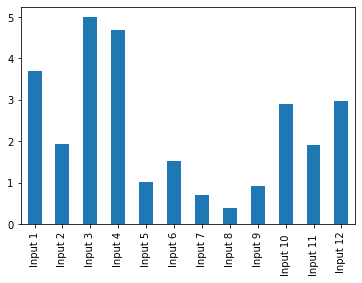

In [49]:
df.mean().plot(kind='bar')
#get column names
columns = df.columns.tolist()

#exclude last column (class)
column = columns[:len(columns)-1]

#get and print the mean values for all sensors
print('The mean values are: \n{}'.format(df.mean()))

#store mean values
mean_values=df[:].mean()

<h2 style='color:green'> Data Preprocessing</h2>
<h3>Feature Matrix and Target Vector</h3>

In [50]:
y=df['class']
X=df.loc[:, df.columns != 'class']


<h3> Converting the features dataframe to a numpy array</h3>

In [51]:
X=np.array(X)
print(X)


[[4.406 0.612 5.691 ... 5.083 5.503 0.754]
 [4.68  0.532 5.461 ... 5.099 5.601 0.955]
 [4.738 0.53  5.68  ... 5.127 5.535 0.728]
 ...
 [3.64  1.284 5.111 ... 1.46  1.118 4.867]
 [3.746 1.261 5.049 ... 1.482 1.128 5.627]
 [3.959 1.108 5.422 ... 1.595 1.244 5.623]]


<h3> Label Encoding</h3>

Transforming the categorical labels into integers using the scikit-learn label encoder


In [52]:
#import label encoder
from sklearn.preprocessing import LabelEncoder

#integer encode
label_encoder = LabelEncoder()
# encode the class labels
y_encoded=label_encoder.fit_transform(df['class'])

#print the categorical class labels we encoded (note the underscore!)
print('class labels afer encoding', list(label_encoder.classes_))

#print the encode values
print('encoded values:',y_encoded)

#print the shgape of the encoded classes
print('encoded shape:',y_encoded.shape)

class labels afer encoding ['one', 'three', 'two']
encoded values: [0 0 0 ... 2 2 2]
encoded shape: (1463,)



<h2>Spliting the data into Training and Testing Sets </h2>


<b> Using a 80% / 20% train/test split</b>


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [54]:
print('X_train Shape of the data : {}'.format(X_train.shape))
print('y_train Shape of the data : {}'.format(y_train.shape))

X_train Shape of the data : (1170, 12)
y_train Shape of the data : (1170,)


In [55]:
print('X_test Shape of the data : {}'.format(X_test.shape))
print('y_test Shape of the data : {}'.format(y_test.shape))

X_test Shape of the data : (293, 12)
y_test Shape of the data : (293,)


<h2 style='color:green'> Scale the Data</h2>


<h3> StandardScaler from Scikit-learn to transform (scale) features </h3>

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

- Using the preceding code, I loaded the StandardScaler class from the preprocessing module and initialized a new StandardScaler object that was assigned to the variable sc.
- Using the fit method, StandardScaler estimated the parameters μ (sample mean) and (standard deviation) for each feature dimension from the training data.
- By calling the transform method, I then standardized the training data using those estimated parameters μ and 𝜎
- I used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other. 



<h2 style='color:green'> Model Building</h2>
<h4> Here I will use three different algorithyms and compare their results </h4>

1. K-Nearest Neighbor (with K=10, K=100, K=200)
2. Logistic Regression
3. Linear Support Vector Classifier 

<h2 style='color:green'> Building a KNN Classification Model for K = 10, 100 and 200 </h2>

<b>Next I instantiate, fit, predict and test the model's performance (accuracy) for the K-Nearest Neighbor Model in SciKit-Learn for K = 10, 100 and 200.</b>

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for k in [10,100,200]:
    knn= KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_std,y_train)
    y_pred=knn.predict(X_test_std)

    print('Test accuracy (using knn.score() for k = {0} is:{1:0.3f}'.format(k, knn.score(X_test_std, y_test)))

    print("Model's Predictive Accuracy for k ={0} is: {1:0.2f}".format(k,metrics.accuracy_score(y_test, y_pred)))

    print('Misclassified samples for k={0} are {1}\n'.format(k, (y_pred != y_test).sum()))

Test accuracy (using knn.score() for k = 10 is:0.986
Model's Predictive Accuracy for k =10 is: 0.99
Misclassified samples for k=10 are 4

Test accuracy (using knn.score() for k = 100 is:0.935
Model's Predictive Accuracy for k =100 is: 0.94
Misclassified samples for k=100 are 19

Test accuracy (using knn.score() for k = 200 is:0.826
Model's Predictive Accuracy for k =200 is: 0.83
Misclassified samples for k=200 are 51



<h3>Predicting class-membership probabilities</h3>



**class membership label indices after encoding**

    0 = 'one' (the Substance is Substance 1)
    1 = 'three' (false alarm)
    2 = 'two' (The Substance is Substance 2)



In [58]:
print('The predicted class membership probability is: {0}'.format(knn.predict_proba(X_test_std[:10,:])))


The predicted class membership probability is: [[0.095 0.    0.905]
 [0.73  0.    0.27 ]
 [0.63  0.37  0.   ]
 [0.955 0.    0.045]
 [0.485 0.49  0.025]
 [0.485 0.515 0.   ]
 [0.    0.11  0.89 ]
 [0.005 0.93  0.065]
 [0.485 0.395 0.12 ]
 [0.345 0.135 0.52 ]]


<h3>class-membership probability</h3>


In [59]:
print('The predicted class membership probability is: {0}'.format(knn.predict_proba(X_test_std[:125,:])))

The predicted class membership probability is: [[0.095 0.    0.905]
 [0.73  0.    0.27 ]
 [0.63  0.37  0.   ]
 [0.955 0.    0.045]
 [0.485 0.49  0.025]
 [0.485 0.515 0.   ]
 [0.    0.11  0.89 ]
 [0.005 0.93  0.065]
 [0.485 0.395 0.12 ]
 [0.345 0.135 0.52 ]
 [0.985 0.    0.015]
 [0.05  0.945 0.005]
 [0.06  0.93  0.01 ]
 [0.    0.2   0.8  ]
 [0.96  0.    0.04 ]
 [0.06  0.705 0.235]
 [0.055 0.94  0.005]
 [0.975 0.    0.025]
 [0.265 0.    0.735]
 [0.065 0.    0.935]
 [0.11  0.57  0.32 ]
 [0.385 0.    0.615]
 [0.96  0.    0.04 ]
 [0.105 0.31  0.585]
 [0.97  0.    0.03 ]
 [0.035 0.535 0.43 ]
 [0.97  0.    0.03 ]
 [0.06  0.66  0.28 ]
 [0.11  0.89  0.   ]
 [0.065 0.    0.935]
 [0.045 0.125 0.83 ]
 [0.13  0.035 0.835]
 [0.02  0.34  0.64 ]
 [0.055 0.    0.945]
 [0.08  0.92  0.   ]
 [0.485 0.515 0.   ]
 [0.965 0.    0.035]
 [0.96  0.    0.04 ]
 [0.99  0.    0.01 ]
 [0.405 0.34  0.255]
 [0.49  0.51  0.   ]
 [0.035 0.93  0.035]
 [0.035 0.93  0.035]
 [0.005 0.26  0.735]
 [0.74  0.    0.26 ]
 [0.64  

<h3> Class-membership probability</h3>


In [60]:
print('The predicted class membership probability is: {0}'.format(knn.predict_proba(X_test_std[:200,:])))

The predicted class membership probability is: [[0.095 0.    0.905]
 [0.73  0.    0.27 ]
 [0.63  0.37  0.   ]
 [0.955 0.    0.045]
 [0.485 0.49  0.025]
 [0.485 0.515 0.   ]
 [0.    0.11  0.89 ]
 [0.005 0.93  0.065]
 [0.485 0.395 0.12 ]
 [0.345 0.135 0.52 ]
 [0.985 0.    0.015]
 [0.05  0.945 0.005]
 [0.06  0.93  0.01 ]
 [0.    0.2   0.8  ]
 [0.96  0.    0.04 ]
 [0.06  0.705 0.235]
 [0.055 0.94  0.005]
 [0.975 0.    0.025]
 [0.265 0.    0.735]
 [0.065 0.    0.935]
 [0.11  0.57  0.32 ]
 [0.385 0.    0.615]
 [0.96  0.    0.04 ]
 [0.105 0.31  0.585]
 [0.97  0.    0.03 ]
 [0.035 0.535 0.43 ]
 [0.97  0.    0.03 ]
 [0.06  0.66  0.28 ]
 [0.11  0.89  0.   ]
 [0.065 0.    0.935]
 [0.045 0.125 0.83 ]
 [0.13  0.035 0.835]
 [0.02  0.34  0.64 ]
 [0.055 0.    0.945]
 [0.08  0.92  0.   ]
 [0.485 0.515 0.   ]
 [0.965 0.    0.035]
 [0.96  0.    0.04 ]
 [0.99  0.    0.01 ]
 [0.405 0.34  0.255]
 [0.49  0.51  0.   ]
 [0.035 0.93  0.035]
 [0.035 0.93  0.035]
 [0.005 0.26  0.735]
 [0.74  0.    0.26 ]
 [0.64  

<h2 style='color:green'> Building a Logistic Regression Classification Model  </h2>

<b> Importing and Instantiating the Logistic Regression Model in SciKit-Learn</b>


In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg',
                       multi_class='multinomial',
                       random_state=0)


<h3>Training the model by calling the model's fit function</h3>

Now that the model has been instantiated (created) it still needs to be trained (fitted) to the training dataset.

In [62]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

<h3>Evaluate the Logistic Regression Model</h3>


In [63]:
y_pred = lr.predict(X_test_std)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['two' 'one' 'one' 'one' 'one' 'one' 'two' 'three' 'three' 'one' 'one'
 'three' 'three' 'two' 'one' 'three' 'three' 'one' 'two' 'two' 'three'
 'one' 'one' 'two' 'one' 'three' 'one' 'three' 'three' 'two' 'two' 'two'
 'two' 'two' 'three' 'one' 'one' 'one' 'one' 'one' 'one' 'three' 'three'
 'two' 'one' 'one' 'one' 'three' 'two' 'one' 'one' 'three' 'one' 'one'
 'three' 'one' 'two' 'two' 'two' 'one' 'one' 'one' 'three' 'three' 'three'
 'one' 'two' 'two' 'two' 'three' 'two' 'three' 'two' 'two' 'two' 'two'
 'one' 'one' 'one' 'two' 'one' 'three' 'three' 'one' 'one' 'two' 'two'
 'one' 'three' 'one' 'two' 'two' 'one' 'two' 'two' 'two' 'two' 'three'
 'one' 'one' 'one' 'one' 'two' 'one' 'two' 'one' 'three' 'two' 'three'
 'three' 'one' 'one' 'one' 'two' 'two' 'two' 'three' 'one' 'one' 'one'
 'three' 'one' 'three' 'one' 'three' 'one' 'one' 'three' 'one' 'two' 'two'
 'one' 'one' 'one' 'one' 'three' 'three' 'two' 'three' 'one' 'two' 'three'
 'one' 'two' 'three' 'three' 'three' '

<h3>Evaluate the Logistic Regression Model's Performance</h3>


Using SciKit Learn's built-in scoring method to evaluate the model's performance accuracy.

In [64]:
print('\nTest set accuracy: {0:0.2f}%'.format(100*lr.score(X_test_std, y_test)))


Test set accuracy: 97.61%


<h3>Predicting class-membership probabilities using the Logistic Regression Model</h3>

<h3>Class-membership probability</h3>


Predicting the class membership probability by using the row with **index=10** from the X_test_std data. 

In [65]:

print('The predicted probability for belonging to the classes[class 0 = one, class 1 = false alarm, class 2 = two] are {0}'.format(lr.predict_proba(X_test_std[10:])))


The predicted probability for belonging to the classes[class 0 = one, class 1 = false alarm, class 2 = two] are [[1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.027 0.013 0.96 ]
 [1.    0.    0.   ]
 [0.001 0.999 0.   ]
 [0.    1.    0.   ]
 [0.999 0.    0.001]
 [0.015 0.    0.985]
 [0.001 0.    0.999]
 [0.003 0.981 0.016]
 [0.872 0.007 0.121]
 [0.768 0.    0.232]
 [0.126 0.108 0.766]
 [0.992 0.    0.008]
 [0.004 0.993 0.003]
 [0.999 0.    0.001]
 [0.004 0.958 0.038]
 [0.001 0.999 0.   ]
 [0.001 0.    0.999]
 [0.116 0.017 0.868]
 [0.076 0.021 0.903]
 [0.094 0.37  0.536]
 [0.001 0.    0.999]
 [0.    1.    0.   ]
 [0.939 0.06  0.001]
 [1.    0.    0.   ]
 [0.999 0.    0.001]
 [1.    0.    0.   ]
 [0.938 0.032 0.03 ]
 [0.999 0.001 0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.019 0.167 0.814]
 [0.99  0.    0.01 ]
 [0.991 0.    0.009]
 [1.    0.    0.   ]
 [0.001 0.993 0.007]
 [0.293 0.    0.707]
 [0.996 0.    0.004]
 [0.993 0.    0.007]
 [0.004 0.996 0.   ]
 [0.96

<h3> Class-membership probability</h3>


In [66]:
print('The predicted probability for belonging to the classes[class 0 = one, class 1 = false alarm, class 2 = two] are {0}'.format(lr.predict_proba(X_test_std[:120])))


The predicted probability for belonging to the classes[class 0 = one, class 1 = false alarm, class 2 = two] are [[0.001 0.    0.999]
 [0.973 0.    0.027]
 [0.999 0.    0.   ]
 [0.999 0.    0.001]
 [0.898 0.1   0.002]
 [0.998 0.001 0.001]
 [0.073 0.005 0.921]
 [0.001 0.999 0.   ]
 [0.109 0.89  0.001]
 [0.947 0.003 0.049]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.027 0.013 0.96 ]
 [1.    0.    0.   ]
 [0.001 0.999 0.   ]
 [0.    1.    0.   ]
 [0.999 0.    0.001]
 [0.015 0.    0.985]
 [0.001 0.    0.999]
 [0.003 0.981 0.016]
 [0.872 0.007 0.121]
 [0.768 0.    0.232]
 [0.126 0.108 0.766]
 [0.992 0.    0.008]
 [0.004 0.993 0.003]
 [0.999 0.    0.001]
 [0.004 0.958 0.038]
 [0.001 0.999 0.   ]
 [0.001 0.    0.999]
 [0.116 0.017 0.868]
 [0.076 0.021 0.903]
 [0.094 0.37  0.536]
 [0.001 0.    0.999]
 [0.    1.    0.   ]
 [0.939 0.06  0.001]
 [1.    0.    0.   ]
 [0.999 0.    0.001]
 [1.    0.    0.   ]
 [0.938 0.032 0.03 ]
 [0.999 0.001 0.   ]
 [0.    1.    0.   ]
 [0.  

<h3>Class-membership probability</h3>


In [67]:
print('The predicted probability for belonging to the classes[class 0 = one, class 1 = false alarm, class 2 = two] are {0}'.format(lr.predict_proba(X_test_std[:200])))


The predicted probability for belonging to the classes[class 0 = one, class 1 = false alarm, class 2 = two] are [[0.001 0.    0.999]
 [0.973 0.    0.027]
 [0.999 0.    0.   ]
 [0.999 0.    0.001]
 [0.898 0.1   0.002]
 [0.998 0.001 0.001]
 [0.073 0.005 0.921]
 [0.001 0.999 0.   ]
 [0.109 0.89  0.001]
 [0.947 0.003 0.049]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.027 0.013 0.96 ]
 [1.    0.    0.   ]
 [0.001 0.999 0.   ]
 [0.    1.    0.   ]
 [0.999 0.    0.001]
 [0.015 0.    0.985]
 [0.001 0.    0.999]
 [0.003 0.981 0.016]
 [0.872 0.007 0.121]
 [0.768 0.    0.232]
 [0.126 0.108 0.766]
 [0.992 0.    0.008]
 [0.004 0.993 0.003]
 [0.999 0.    0.001]
 [0.004 0.958 0.038]
 [0.001 0.999 0.   ]
 [0.001 0.    0.999]
 [0.116 0.017 0.868]
 [0.076 0.021 0.903]
 [0.094 0.37  0.536]
 [0.001 0.    0.999]
 [0.    1.    0.   ]
 [0.939 0.06  0.001]
 [1.    0.    0.   ]
 [0.999 0.    0.001]
 [1.    0.    0.   ]
 [0.938 0.032 0.03 ]
 [0.999 0.001 0.   ]
 [0.    1.    0.   ]
 [0.  

<h2 style='color:green'> Building Linear Support Vector Classifier Model</h2>
<h3>Scikit-learn Linear Support Vector Classifier </h3>
Importing and instantiating the Linear Support Vector Classifier Model

In [68]:
from sklearn import svm

lsv = svm.SVC(probability=True, kernel='linear')

<h3>Training the model by calling the model's fit function</h3>



In [69]:
lsv.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<h3>Evaluating the Linear Support Vector Classifier Model</h3>


In [70]:
y_pred = lsv.predict(X_test_std)
print("Test set predictions:\n {}".format(y_pred))
print('\nTest set accuracy: {0:0.2f}%'.format(100*lsv.score(X_test_std, y_test)))

Test set predictions:
 ['two' 'one' 'one' 'one' 'one' 'one' 'two' 'three' 'three' 'one' 'one'
 'three' 'three' 'two' 'one' 'three' 'three' 'one' 'two' 'two' 'three'
 'one' 'one' 'two' 'one' 'three' 'one' 'three' 'three' 'two' 'two' 'two'
 'three' 'two' 'three' 'one' 'one' 'one' 'one' 'one' 'one' 'three' 'three'
 'two' 'one' 'one' 'one' 'three' 'two' 'one' 'one' 'three' 'one' 'one'
 'three' 'one' 'two' 'two' 'two' 'one' 'one' 'one' 'three' 'three' 'three'
 'one' 'two' 'two' 'two' 'three' 'two' 'three' 'two' 'two' 'two' 'two'
 'one' 'one' 'one' 'two' 'one' 'three' 'three' 'one' 'one' 'two' 'two'
 'one' 'three' 'one' 'two' 'two' 'one' 'two' 'two' 'two' 'two' 'three'
 'one' 'one' 'one' 'one' 'two' 'one' 'two' 'one' 'three' 'two' 'three'
 'three' 'one' 'one' 'one' 'two' 'two' 'two' 'three' 'one' 'one' 'one'
 'three' 'one' 'three' 'one' 'three' 'one' 'one' 'three' 'one' 'two' 'two'
 'one' 'one' 'one' 'one' 'three' 'three' 'two' 'three' 'one' 'two' 'three'
 'one' 'two' 'three' 'three' 'three'

<h3>Evaluating the Linear Support Vector Model's Performance</h3>



In [71]:
print("Model's performance accuracy: {0:0.3f}".format(lsv.score(X_test_std, y_test)))

Model's performance accuracy: 0.980


<h3>Using the Predict Method of the Linear Support Vector Model </h3>


Using SciKit Learn's built-in predict method to test the model's predictive performance for the first row of data in X_test_std


In [72]:
lsv.predict_proba(X_test_std[1:])

array([[0.977, 0.   , 0.023],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.001],
       [0.852, 0.121, 0.027],
       [0.999, 0.   , 0.001],
       [0.043, 0.013, 0.944],
       [0.   , 0.999, 0.001],
       [0.092, 0.907, 0.001],
       [0.926, 0.008, 0.066],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.999, 0.001],
       [0.018, 0.019, 0.963],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.999, 0.   , 0.001],
       [0.009, 0.   , 0.991],
       [0.   , 0.   , 1.   ],
       [0.   , 0.995, 0.005],
       [0.87 , 0.002, 0.128],
       [0.788, 0.   , 0.212],
       [0.118, 0.369, 0.514],
       [0.991, 0.   , 0.009],
       [0.   , 0.998, 0.002],
       [0.999, 0.   , 0.001],
       [0.001, 0.986, 0.013],
       [0.   , 0.998, 0.002],
       [0.   , 0.   , 1.   ],
       [0.052, 0.02 , 0.928],
       [0.064, 0.037, 0.899],
       [0.051, 0.659, 0.29 ],
       [0.   , 0.   , 1.   ],
       [0.

<h3>Printing the number of misclassifications using numpy </h3>



In [73]:
print('Number of misclassified samples = {0}\n'.format((y_pred != y_test).sum()))

Number of misclassified samples = 6



<h2 style='color:green'>Confusion Matrix</h2>




In [74]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[128   0   3]
 [  0  76   1]
 [  2   0  83]]


<h3>Classification Correctness</h3>

The total number of correct classifications for substance two is 83 according to the third row and column of the confusion matrix.

<h3>Classification report for Linear Support Vector Model</h3>


In [75]:
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred, target_names = ['one','two', 'three']))

Classification Report:
              precision    recall  f1-score   support

         one       0.98      0.98      0.98       131
         two       1.00      0.99      0.99        77
       three       0.95      0.98      0.97        85

    accuracy                           0.98       293
   macro avg       0.98      0.98      0.98       293
weighted avg       0.98      0.98      0.98       293



According to the classification report f1-score substance 1 was correctly predicted 79% of the time. 

<h3 style='color:purple'>Comparative Summary of Models Performance</h3>





#### KNN Classification Model

My KKN  model had an accuracy of 98.6%. This model was the most accuracte when k = 10. 

####  Logistic Regression Model

The Logistic Regression model's accuracy was 97.61%. This model performed the worst on this dataset. 

#### Linear Support Vector Classification Model

The Linear Support Vector model's accuracy was 98.0%

Throughout this project I created three different machine learning algs; K-Nearest neighbor, logistic regression, and linear support vector classifier models. While these models are what we gain statistical insights from, there are various processes that need to be performed on the data before building the models. After importing the data and printing a descriptive statistical summary we cleaned the data using pandas and numpy to change all the -9999 values to nan values. Next I we moved on to data preprocessing where we performed label encoding and trained the dataset. I followed this up by scaling the data to standardize the training data and test set. This standardization makes the values in the training and test dataset comparable moving forward. 
My first model used the k-nearest neighbor algorithm to determine the class memberships.  Through this method, the object is assigned to the class most common amongst its closest “k” neighbors, and in this case I used 10,100, and 200.   The accuracies were greater the lower our value of k became.  Having high k values defeats the purpose of KNN depending upon the dataset size because eventually a closest neighbor will not share features which are valuable in the classification process.  The KNN model provided the greatest degree of accuracy when K=10 with test accuracy of 98.6%.  
The second model was logistic regression which predicts the probability of a classification as a function on the features. After training this model using the fit function, I am able to begin evaluation by using the test set to create and display the model’s class prediction vector. With the logistic regression model I was also able to determine the model’s performance by calculating the test set accuracy and predicting class-membership probabilities at specified indices. 
The third model built was the Linear Support Vector Classifier using SciKit-Learn. Like the previous models I train and fit the data before making the model’s predictions and determining performance accuracy and number of misclassification samples. Although you are able to perform many of the same steps with these different models the internal processes are different. For example, Logistic regression uses the entire dataset to perform its functions while the LSVC model only considers the points near the support vectors.   
While the KNN model when K = 10 happened to be the most accurate on this dataset it may not be the most reliable because the accuracy significantly dropped when you change the K value. If I was able to be working on a dataset with linear solutions then the Logistic Regression model would be the ideal model to use out of the three built. However, the Logistic Regression model cannot support non-linear solutions like the KNN and LSVC model can. After building the models I computed the confusion matrix and classification report in order to perform the comparative analysis. 


*** Quantitave Values have changed since clearing Kernal and running several times***